# Data Describtion

| Attribute | Description |
|----------|----------|
|RowNumber	|Row Numbers from 1 to 10000
|CustomerId	|Unique Ids for bank customer identification
|Surname	|Customer's last name
|CreditScore |Credit score of the customer
|Geography	|The country from which the customer belongs
|Gender	|Male or Female
|Age  |Age of the customer
|Tenure	|Number of years for which the customer has been with the bank
|Balance	|Bank balance of the customer
|NumOfProducts	|Number of bank products the customer is utilising
|HasCrCard	|Binary Flag for whether the customer holds a credit card with the bank or not
|IsActiveMember	|Binary Flag for whether the customer is an active member with the bank or not
|EstimatedSalary	|Estimated salary of the customer in Dollars
|Exited	|Binary flag 1 if the customer closed account with bank and 0 if the customer is retained



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Understand and clean data

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- We note that all data type is consistent

- we don't have null data 


In [6]:
# frist we drop RowNumber , CustomerId  and Surname
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace = True)

In [7]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [8]:
#check null
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#check duplicated 
df.duplicated().sum()

0

----------------------

# EDA

### 1- Univarate

##### Categorical

In [10]:
df_eda=df.copy()

In [11]:
categorical=df_eda.select_dtypes(include="object").columns
categorical

Index(['Geography', 'Gender'], dtype='object')

In [12]:
for cat in categorical:
    print(cat)
    print(df_eda[cat].value_counts())
    print("*******************")

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
*******************
Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
*******************


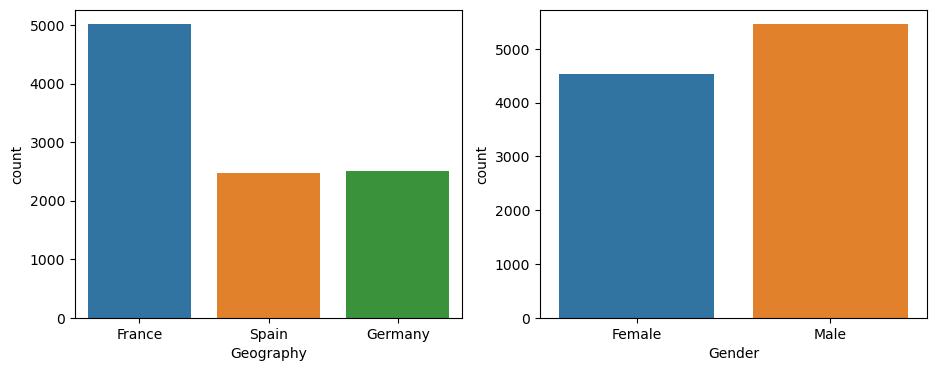

In [13]:
plt.figure(figsize=(11,4))
for i,cat in enumerate(categorical,1):
    plt.subplot(1,2,i)
    sns.countplot(x=df_eda[cat])

- in preprocessing process we will use one-Hot encoding to convert this to numerical

###### numerical

In [14]:
numerical=df_eda.select_dtypes(exclude="object").columns
numerical

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df_eda[numerical].describe().round(2)

CreditScore       Age    Tenure    Balance  NumOfProducts  HasCrCard  \
count     10000.00  10000.00  10000.00   10000.00       10000.00   10000.00   
mean        650.53     38.92      5.01   76485.89           1.53       0.71   
std          96.65     10.49      2.89   62397.41           0.58       0.46   
min         350.00     18.00      0.00       0.00           1.00       0.00   
25%         584.00     32.00      3.00       0.00           1.00       0.00   
50%         652.00     37.00      5.00   97198.54           1.00       1.00   
75%         718.00     44.00      7.00  127644.24           2.00       1.00   
max         850.00     92.00     10.00  250898.09           4.00       1.00   

       IsActiveMember  EstimatedSalary   Exited  
count        10000.00         10000.00  10000.0  
mean             0.52        100090.24      0.2  
std              0.50         57510.49      0.4  
min              0.00            11.58      0.0  
25%              0.00         51002.11      0.0  
50%              1.00        100193.92      0.0  
75%              1.00        149388.25      0.0  
max              1.00        199992.48      1.0

In [16]:
import plotly.graph_objects as go

In [17]:
# to visulaztion 

columns=["CreditScore","Age","Balance","EstimatedSalary"]
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("CreditScore","Age", "Balance","EstimatedSalary")) # to make 4 figures with 2 rows and 2 col

fig.add_trace(go.Histogram(x=df_eda["CreditScore"]),row=1,col=1)
fig.add_trace(go.Histogram(x=df_eda["Age"]),row=1,col=2)

fig.add_trace(go.Histogram(x=df_eda["Balance"]),row=2,col=1)
fig.add_trace(go.Histogram(x=df_eda["EstimatedSalary"]),row=2,col=2)
fig.show()

- check outliers in Age 

- check outliers in Balance



we note also :

- we used standrad sclaing in preprocessing process to handling scaling

###### Age

In [18]:
px.histogram(df_eda["Age"])

In [19]:
px.box(x=df_eda["Age"])

In [20]:
df_eda.Age.quantile([0,0.25,0.50,0.70,0.80,0.90,0.95,0.98,0.99,0.999]).to_frame().T

0.000  0.250  0.500  0.700  0.800  0.900  0.950  0.980  0.990  0.999
Age   18.0   32.0   37.0   42.0   46.0   53.0   60.0   67.0   72.0   81.0

In [21]:
df_eda[df_eda.Age>67]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
85            652     Spain  Female   75      10       0.00              2   
158           646    France  Female   73       6   97259.25              1   
230           673    France    Male   72       1       0.00              2   
252           681    France  Female   79       0       0.00              2   
310           652    France  Female   80       4       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
9736          659     Spain    Male   78       2  151675.65              1   
9747          610   Germany  Female   69       5   86038.21              3   
9753          656   Germany    Male   68       7  153545.11              1   
9894          521    France  Female   77       6       0.00              2   
9936          609    France    Male   77       1       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
85            1               1        114675.75       0  
158           0               1        104719.66       0  
230           0               1        111981.19       0  
252           0               1        170968.99       0  
310           1               1        188603.07       0  
...         ...             ...              ...     ...  
9736          0               1         49978.67       0  
9747          0               0        192743.06       1  
9753          1               1        186574.68       0  
9894          1               1         49054.10       0  
9936          0               1         18708.76       0  

[192 rows x 11 columns]

All values that greater than 99% of data ( age >67) this outliers ,sothat drop it

In [22]:
df_eda.drop(df_eda[df_eda.Age>67].index,inplace=True)

###### Balance

In [23]:
px.histogram(df_eda["Balance"])

In [24]:
px.box(x=df_eda["Balance"])

In [25]:
df_eda.Balance.quantile([0,0.40,0.50,0.70,0.80,0.90,0.95,0.98,0.99,0.999]).to_frame().T.round(2)

0.000     0.400     0.500      0.700      0.800      0.900     0.950  \
Balance    0.0  73291.28  97350.83  122196.26  133772.99  149337.61  162823.5   

             0.980      0.990      0.999  
Balance  176903.98  185964.23  212387.17

In [26]:
df_eda[df_eda.Balance>df_eda.Balance.quantile(0.99)]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
138           584     Spain  Female   48       2  213146.20              1   
177           606   Germany    Male   36       5  190479.48              2   
354           613    France  Female   45       1  187841.99              2   
520           850    France  Female   35       1  211774.31              1   
656           549     Spain    Male   25       6  193858.20              1   
...           ...       ...     ...  ...     ...        ...            ...   
9860          775    France  Female   30      10  191091.74              2   
9916          616     Spain  Female   44       7  193213.02              2   
9920          678    France  Female   49       3  204510.94              1   
9925          694    France  Female   38       5  195926.39              1   
9944          744   Germany    Male   41       7  190409.34              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
138           1               0         75161.25       1  
177           0               0        179351.89       0  
354           1               1        147224.27       0  
520           1               0        188574.12       1  
656           0               1         21600.11       0  
...         ...             ...              ...     ...  
9860          1               1         96170.38       0  
9916          1               1        137392.77       0  
9920          0               1           738.88       1  
9925          1               1         85522.84       0  
9944          1               1        138361.48       0  

[99 rows x 11 columns]

All values that greater than 99% of data ( Balance >185964.23) this outliers ,sothat drop it

In [27]:
df_eda.drop(df_eda[df_eda.Balance>df_eda.Balance.quantile(0.99)].index,inplace=True)

-------------------------

## 2- Bivarate

we have target feature (Exited) , i will visualize all feature with this target feature

In [28]:
df_eda.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [29]:
golbal_mean=df_eda.Exited.mean() #to calculate percentage of class 1
golbal_mean

0.2035225048923679

### Feature selection

In [30]:
Geography_mean=df_eda.groupby("Geography")["Exited"].mean()
Geography_mean

Geography
France     0.160156
Germany    0.329779
Spain      0.163274
Name: Exited, dtype: float64

In [31]:
Geography_diff=golbal_mean -Geography_mean # differnece between Geography_mean and golbal_mean
Geography_diff

Geography
France     0.043366
Germany   -0.126256
Spain      0.040249
Name: Exited, dtype: float64

if the different is large that mean this feature is important

In [32]:
Geography_risk=Geography_mean/golbal_mean
Geography_risk

Geography
France     0.786922
Germany    1.620354
Spain      0.802239
Name: Exited, dtype: float64

if ratio is far of 1 that mean this feature is important

In [33]:
Gender_mean=df_eda.groupby("Gender")["Exited"].mean()
Gender_mean

Gender
Female    0.249887
Male      0.164937
Name: Exited, dtype: float64

In [34]:
Gender_diff=golbal_mean -Gender_mean # differnece between Gender_mean and golbal_mean
Gender_diff

Gender
Female   -0.046364
Male      0.038586
Name: Exited, dtype: float64

In [35]:
Gender_risk=Gender_mean/golbal_mean
Gender_risk

Gender
Female    1.227808
Male      0.810411
Name: Exited, dtype: float64

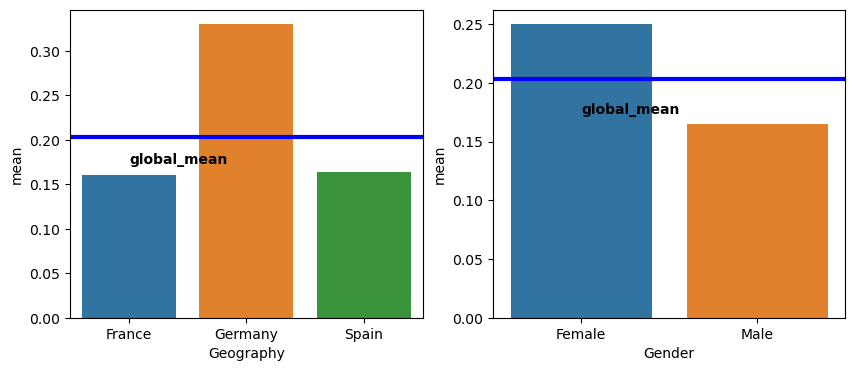

In [36]:
plt.figure(figsize=(10,4))

for i,feature in enumerate(categorical,1):
    plt.subplot(1,2,i)
    df_group = df_eda.groupby(by=feature).Exited.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group)
    graph.axhline(golbal_mean, linewidth=3, color='b')
    plt.text(0, golbal_mean - 0.03, "global_mean", color='black', weight='semibold')

__We note that all categorical features is important__

In [37]:
df_corr=df_eda[numerical].corrwith(df_eda.Exited).reset_index().rename(columns={"index":"columns",0:"Exited"}).sort_values(by="Exited",ascending=False)
df_corr

columns    Exited
8           Exited  1.000000
1              Age  0.340158
3          Balance  0.112261
7  EstimatedSalary  0.010999
5        HasCrCard -0.004345
2           Tenure -0.017287
0      CreditScore -0.027885
4    NumOfProducts -0.048356
6   IsActiveMember -0.151150

__We note that__:

The more efficient features (important) : Age , Balance and IsActiveMember

The less efficient features (not important) : HasCrCard 


--------------------------------------

# 3- MUltivarate

We have 4 important features [ Geography , Gender , Age and IsActiveMember]

i will visualize this features with target feature

In [38]:
# Geography , Gender and Exited
data=df_eda.groupby(["Geography","Gender"])["Exited"].count().reset_index()
data

Geography  Gender  Exited
0    France  Female    2188
1    France    Male    2676
2   Germany  Female    1164
3   Germany    Male    1274
4     Spain  Female    1058
5     Spain    Male    1349

In [39]:
fig=px.bar(data_frame=data,x="Geography",y="Exited",color="Gender",
          text_auto="0.2s")
fig.update_traces(textfont_size=12,textposition="outside")


In [40]:
# Geography , Age and Exited

data=df_eda.groupby(["Geography","Exited"])["Age"].mean().reset_index()
data

Geography  Exited        Age
0    France       0  36.455569
1    France       1  44.978177
2   Germany       0  36.411261
3   Germany       1  44.580846
4     Spain       0  37.195631
5     Spain       1  43.824427

In [41]:
fig=px.bar(data_frame=data,x="Geography",y="Age",color="Exited",
          text_auto="0.2s")
fig.update_traces(textfont_size=12,textposition="outside")


- we note that average of age is same if exited or not

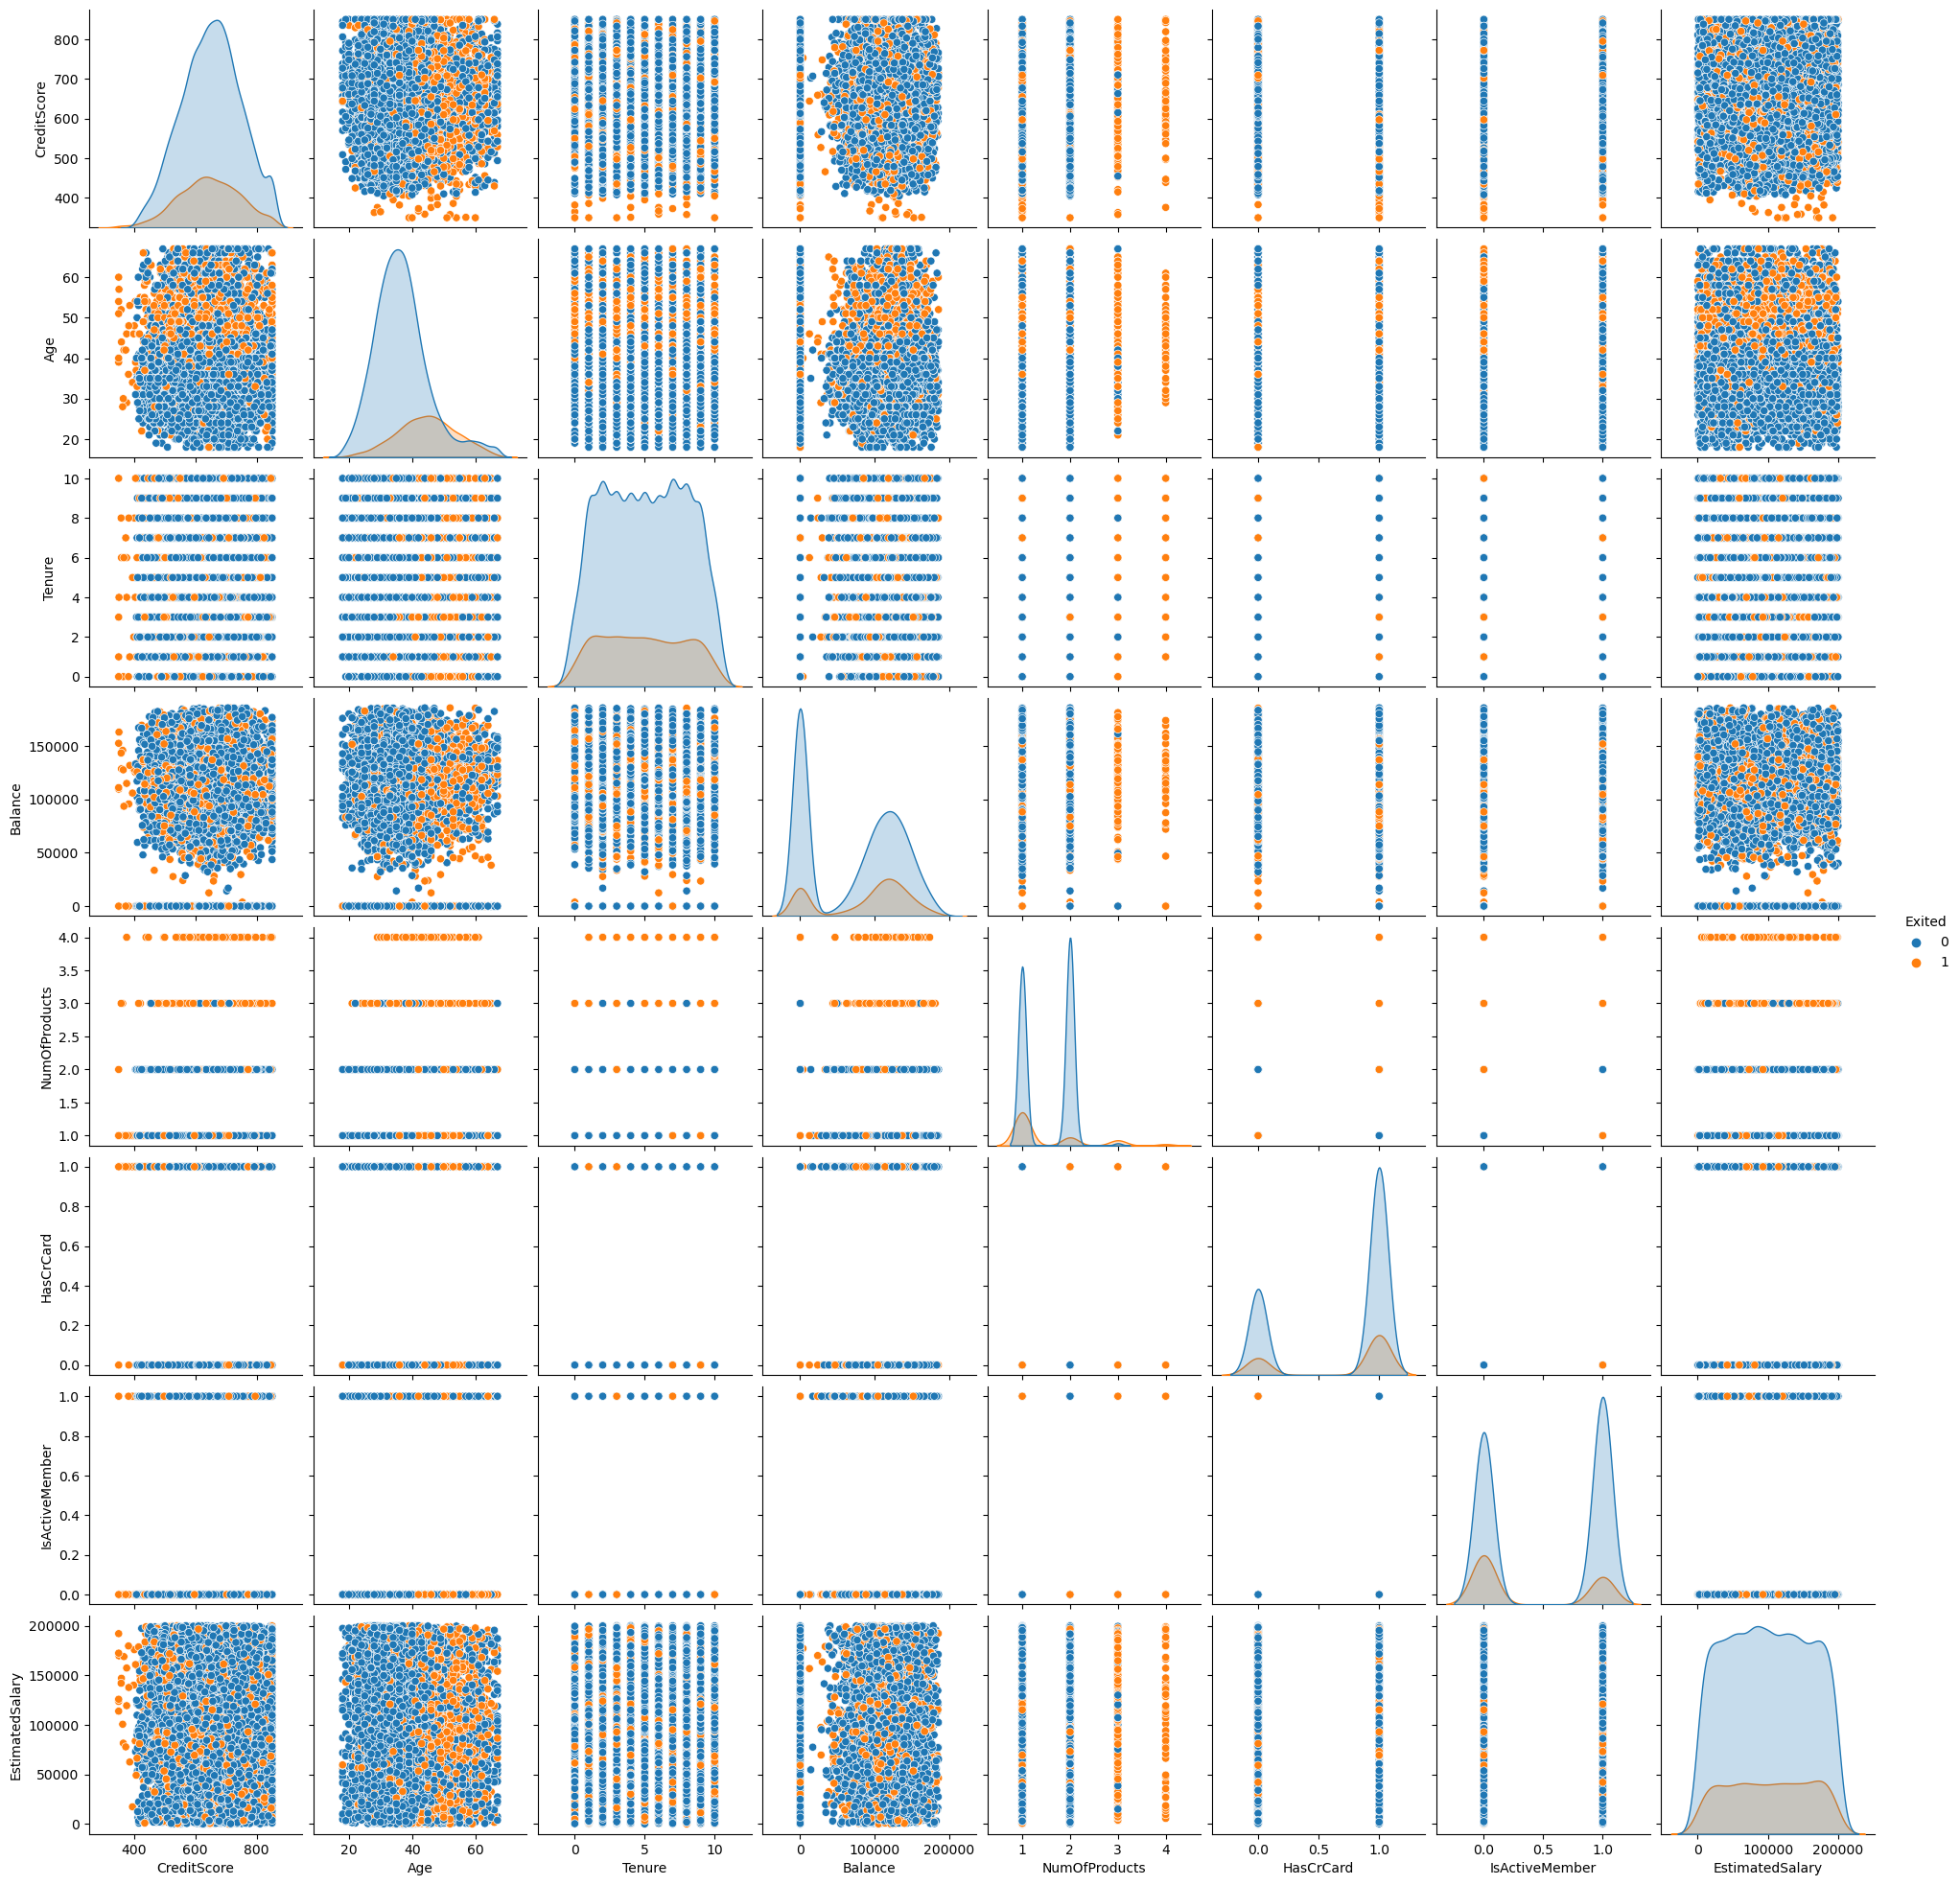

In [42]:
sns.pairplot(df_eda,hue="Exited")


- From last graph i note that this data is non linear 

-----------------------

# preprocessing

In [43]:
df_eda

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[9709 rows x 11 columns]

In [44]:
df_eda.Exited.value_counts()

0    7733
1    1976
Name: Exited, dtype: int64

## Spliting Data

In [45]:
from sklearn.model_selection import train_test_split

X=df_eda.drop("Exited",axis=1)
y=df_eda.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)



In [46]:
print("shape of train data = ",X_train.shape)
print("shape of test data = ",X_test.shape)

shape of train data =  (7281, 10)
shape of test data =  (2428, 10)


In [47]:
categorical=df_eda.select_dtypes(include="object").columns
numerical=df_eda.select_dtypes(exclude="object").columns.drop("Exited")

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

enc=OneHotEncoder()
sc=StandardScaler()
ct=ColumnTransformer(
    [
        ("encoder",enc,categorical),
        ("scaler",sc,numerical)
    ]
        )

X_train_transformer=ct.fit_transform(X_train)

X_test_transformer=ct.transform(X_test)

In [49]:
df_train_transformer=pd.DataFrame(X_train_transformer,columns=ct.get_feature_names_out())#to show dataframe

In [50]:
df_train_transformer

encoder__Geography_France  encoder__Geography_Germany  \
0                           1.0                         0.0   
1                           0.0                         1.0   
2                           0.0                         1.0   
3                           0.0                         1.0   
4                           1.0                         0.0   
...                         ...                         ...   
7276                        1.0                         0.0   
7277                        1.0                         0.0   
7278                        1.0                         0.0   
7279                        1.0                         0.0   
7280                        0.0                         1.0   

      encoder__Geography_Spain  encoder__Gender_Female  encoder__Gender_Male  \
0                          0.0                     1.0                   0.0   
1                          0.0                     1.0                   0.0   
2                          0.0                     0.0                   1.0   
3                          0.0                     0.0                   1.0   
4                          0.0                     1.0                   0.0   
...                        ...                     ...                   ...   
7276                       0.0                     0.0                   1.0   
7277                       0.0                     0.0                   1.0   
7278                       0.0                     0.0                   1.0   
7279                       0.0                     0.0                   1.0   
7280                       0.0                     0.0                   1.0   

      scaler__CreditScore  scaler__Age  scaler__Tenure  scaler__Balance  \
0                2.061312     0.078709        0.692238         0.065395   
1                0.103148    -0.348167        0.000665         1.224980   
2                1.253181    -0.881761        0.346452         0.398434   
3               -1.046884    -0.028010       -1.036695         0.456946   
4                0.279279    -0.668323        0.000665        -1.220660   
...                   ...          ...             ...              ...   
7276             0.445050     0.185428        1.383812        -1.220660   
7277             1.605443    -0.454885        0.346452        -1.220660   
7278             0.610820    -0.028010       -1.036695        -1.220660   
7279            -0.891474    -0.241448        0.346452         0.502390   
7280             0.693706     0.505585        0.000665         0.931134   

      scaler__NumOfProducts  scaler__HasCrCard  scaler__IsActiveMember  \
0                 -0.913176          -1.557675                0.984869   
1                  0.794280          -1.557675                0.984869   
2                  0.794280          -1.557675               -1.015363   
3                 -0.913176          -1.557675                0.984869   
4                  0.794280           0.641982               -1.015363   
...                     ...                ...                     ...   
7276               0.794280           0.641982               -1.015363   
7277               0.794280          -1.557675               -1.015363   
7278               0.794280           0.641982               -1.015363   
7279              -0.913176           0.641982               -1.015363   
7280               0.794280           0.641982               -1.015363   

      scaler__EstimatedSalary  
0                    1.502500  
1                    0.231637  
2                    1.681665  
3                   -0.163546  
4                   -0.173845  
...                       ...  
7276                -1.038184  
7277                 0.008760  
7278                -1.738497  
7279                 0.854782  
7280                -1.167674  

[7281 rows x 13 columns]

##### Imbalace

In [51]:
y_train.value_counts()

0    5793
1    1488
Name: Exited, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

und = RandomUnderSampler(random_state=42)
over=SMOTE(random_state=42,sampling_strategy=0.6)
pipe=Pipeline([
    ("o",over),
    ("u",und)
])

X_im,y_im=pipe.fit_resample(X_train_transformer,y_train)

In [53]:
y_im.value_counts() #new balance in Exited column

0    3475
1    3475
Name: Exited, dtype: int64

In [54]:
X_im

array([[ 1.        ,  0.        ,  0.        , ...,  0.64198224,
         0.9848693 ,  0.5656212 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.55767549,
        -1.01536316, -1.72593306],
       [ 0.        ,  0.        ,  1.        , ...,  0.64198224,
        -1.01536316,  0.05374319],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.64198224,
         0.9848693 , -0.91532726],
       [ 0.        ,  1.        ,  0.        , ...,  0.64198224,
        -1.01536316,  0.2068779 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.64198224,
        -1.01536316,  0.49343234]])

In [55]:
df_train_imbalance=pd.DataFrame(X_im,columns=ct.get_feature_names_out())#to show dataframe

In [56]:
df_train_imbalance

encoder__Geography_France  encoder__Geography_Germany  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   
...                         ...                         ...   
6945                        0.0                         1.0   
6946                        1.0                         0.0   
6947                        0.0                         1.0   
6948                        0.0                         1.0   
6949                        0.0                         0.0   

      encoder__Geography_Spain  encoder__Gender_Female  encoder__Gender_Male  \
0                          0.0                     0.0                   1.0   
1                          0.0                     1.0                   0.0   
2                          1.0                     1.0                   0.0   
3                          1.0                     1.0                   0.0   
4                          0.0                     1.0                   0.0   
...                        ...                     ...                   ...   
6945                       0.0                     0.0                   1.0   
6946                       0.0                     1.0                   0.0   
6947                       0.0                     1.0                   0.0   
6948                       0.0                     1.0                   0.0   
6949                       1.0                     1.0                   0.0   

      scaler__CreditScore  scaler__Age  scaler__Tenure  scaler__Balance  \
0                1.636525     0.505585       -1.036695        -1.220660   
1               -0.839671     0.825741       -0.690909        -1.220660   
2               -1.388786    -0.988480        0.000665        -1.220660   
3                0.455411    -0.348167        0.692238         0.075101   
4               -0.290557    -1.095199       -0.345122        -1.220660   
...                   ...          ...             ...              ...   
6945            -0.874800     2.840393       -0.366195         0.756486   
6946             1.385654     0.924616        1.379191         0.760101   
6947            -0.402165     1.029659        0.425187         0.952780   
6948             1.061585    -0.908135        0.605650         0.925610   
6949            -0.372738     0.186662        1.125471        -1.220660   

      scaler__NumOfProducts  scaler__HasCrCard  scaler__IsActiveMember  \
0                  0.794280           0.641982                0.984869   
1                  0.794280          -1.557675               -1.015363   
2                  0.794280           0.641982               -1.015363   
3                  0.794280           0.641982                0.984869   
4                  0.794280           0.641982               -1.015363   
...                     ...                ...                     ...   
6945              -0.913176           0.641982               -1.015363   
6946              -0.913176           0.641982                0.984869   
6947              -0.913176           0.641982                0.984869   
6948              -0.913176           0.641982               -1.015363   
6949              -0.913176           0.641982               -1.015363   

      scaler__EstimatedSalary  
0                    0.565621  
1                   -1.725933  
2                    0.053743  
3                    0.480085  
4                   -1.024919  
...                       ...  
6945                 0.085585  
6946                -1.152126  
6947                -0.915327  
6948                 0.206878  
6949                 0.493432  

[6950 rows x 13 columns]

-------------------------------

# Modeling

### Logstic regression

In [57]:
# Hyperparameter with ploynomial features
v

#first make pipeline with model and PolynomialFeatures together
pipe=Pipeline(steps=[
                    ("ploy",PolynomialFeatures()),
                    ("log",LogisticRegression())
                    ])
#all possible paramter to select hyperparameter with best one
parameter_log={"ploy__degree":[2,3,4],
                "log__tol":[0.001,0.0001,0.00001],
               "log__C":[1,2,3,4]}

log=GridSearchCV(estimator=pipe,param_grid=parameter_log,cv=3)

#fit
log.fit(X_im,y_im)


/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ploy', PolynomialFeatures()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [1, 2, 3, 4],
                         'log__tol': [0.001, 0.0001, 1e-05],
                         'ploy__degree': [2, 3, 4]})

In [58]:
print("Best parameter in logstic regression",log.best_estimator_)


print("Best parameter in logstic regression",log.best_params_)

#score
log_score=log.best_score_

print("score of valdation of logstic regression = " ,log_score)

Best parameter in logstic regression Pipeline(steps=[('ploy', PolynomialFeatures(degree=4)),
                ('log', LogisticRegression(C=1, tol=0.001))])
Best parameter in logstic regression {'log__C': 1, 'log__tol': 0.001, 'ploy__degree': 4}
score of valdation of logstic regression =  0.8152537165537495


######  Accuracy of logstic regresion

In [59]:
from sklearn.metrics import accuracy_score
y_predict=log.predict(X_test_transformer)

log_test_score= accuracy_score(y_test,y_predict)
print("The Final accuracy of Logstic regression =" ,log_test_score)

The Final accuracy of Logstic regression = 0.7668863261943987


------------------------------------------------------------

### Support vector machine

In [60]:
#hyperparameter
from sklearn.svm import SVC

svc_parameter=[
               {"C":[1,10,100,1000],"kernel":["poly"],"degree":[2,3,4]},
               {"C":[1,10,100,1000],"kernel":["rbf"],'gamma': [0.001, 0.0001]}
                ]

svc=GridSearchCV(estimator=SVC(),param_grid=svc_parameter,cv=3)
#fit
svc.fit(X_im,y_im)

#best parameter
print("Best parameter in SVC",svc.best_params_)
print("Best score in SVC",svc.best_score_)

Best parameter in SVC {'C': 1000, 'degree': 3, 'kernel': 'poly'}
Best score in SVC 0.8089237542143636


In [61]:
#score
svc_score=svc.best_score_
print("Score of SCV = ",svc_score)

Score of SCV =  0.8089237542143636


######  Accuracy of SVC

In [62]:
y_predict=svc.predict(X_test_transformer)

svc_test_score= accuracy_score(y_test,y_predict)
print("The Final accuracy of SVC =" ,svc_test_score)

The Final accuracy of SVC = 0.8080724876441515


-------------------------

### KNN

In [63]:
#before using hyperparameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_im,y_im)

knn.score(X_test_transformer,y_test)

0.7619439868204283

In [64]:
#hyperparmaret

knn_parameter=[{"n_neighbors":[x for x in range(3,33,2)],
               "weights":["uniform","distance"],
               }
                
              ]

knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_parameter,cv=3)

#fit
knn.fit(X_im,y_im)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31],
                          'weights': ['uniform', 'distance']}])

In [65]:
#best parameter
print("Best parameter in SVC",knn.best_params_)
print("Best score in SVC",knn.best_score_)

Best parameter in SVC {'n_neighbors': 5, 'weights': 'distance'}
Best score in SVC 0.8397145426323768


In [66]:
#score
knn_score=knn.best_score_
print("Score of KNN = ",knn_score)

Score of KNN =  0.8397145426323768


######  Accuracy of KNN

In [67]:
y_predict_knn=knn.predict(X_test_transformer)

knn_test_score= accuracy_score(y_test,y_predict_knn)
print("The Final accuracy of KNN =" ,knn_test_score)

The Final accuracy of KNN = 0.764003294892916


---------------------------

### Decsion Tree

In [68]:
#hyperparmaret
from sklearn.tree import DecisionTreeClassifier

dtc_parameter={"criterion":['gini','entropy','log_loss'],
               "splitter":["best","random"],
               'max_depth':[x for x in range(1,30,2)],
               'min_samples_split':[1,2,3]
               }

dtc=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=dtc_parameter,cv=3)

#fit
dtc.fit(X_im,y_im)

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/ramy/anaconda3/lib/python3.9/site

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [69]:
#best parameter
print("Best parameter in DTC",dtc.best_params_)
print("Best score in DTC",dtc.best_score_)

Best parameter in DTC {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 3, 'splitter': 'random'}
Best score in DTC 0.7966936207039209


In [70]:
#score
dtc_score=dtc.best_score_
print("Score of DTC = ",dtc_score)

Score of DTC =  0.7966936207039209


In [71]:
dtc.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=3,
                       random_state=0, splitter='random')

In [72]:
feature_importances=dtc.best_estimator_.feature_importances_
feature_importances

array([0.03011903, 0.03268927, 0.01267894, 0.02298573, 0.02188142,
       0.10117308, 0.25640914, 0.10328575, 0.12044091, 0.12994487,
       0.03593867, 0.04298629, 0.08946691])

In [73]:
df_train_imbalance.columns

Index(['encoder__Geography_France', 'encoder__Geography_Germany',
       'encoder__Geography_Spain', 'encoder__Gender_Female',
       'encoder__Gender_Male', 'scaler__CreditScore', 'scaler__Age',
       'scaler__Tenure', 'scaler__Balance', 'scaler__NumOfProducts',
       'scaler__HasCrCard', 'scaler__IsActiveMember',
       'scaler__EstimatedSalary'],
      dtype='object')

In [74]:
for i in range(len(feature_importances)):
    print("name of feature =",df_train_imbalance.columns[i])
    print("the ratio = ",feature_importances[i])
    print("*"*50)

name of feature = encoder__Geography_France
the ratio =  0.030119033061680393
**************************************************
name of feature = encoder__Geography_Germany
the ratio =  0.03268926673788029
**************************************************
name of feature = encoder__Geography_Spain
the ratio =  0.01267893782843488
**************************************************
name of feature = encoder__Gender_Female
the ratio =  0.022985729216323365
**************************************************
name of feature = encoder__Gender_Male
the ratio =  0.02188142249599733
**************************************************
name of feature = scaler__CreditScore
the ratio =  0.1011730809956392
**************************************************
name of feature = scaler__Age
the ratio =  0.2564091351407899
**************************************************
name of feature = scaler__Tenure
the ratio =  0.1032857531598757
**************************************************
name of feature 

__The important features are __ sorted descending

1)scaler__Age


2)scaler__NumOfProducts


3)scaler__Balance


4)scaler__Tenure


5)scaler__CreditScore

6)scaler__EstimatedSalary

######  Accuracy of Decision Tree

In [75]:
y_predict_dtc=dtc.predict(X_test_transformer)

dtc_test_score= accuracy_score(y_test,y_predict_dtc)
print("The Final accuracy of DTC =" ,dtc_test_score)

The Final accuracy of DTC = 0.7623558484349259


----------------------------------------------------

### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state=0)
clf.fit(X_im,y_im)

clf.score(X_test_transformer,y_test)

0.8397858319604613

In [77]:
#hyperparameter
from sklearn.model_selection import RandomizedSearchCV

#using random search to optimze in time search , the RandomizedSearchCV greater than gridsearch in time run
rfc_parameter={"n_estimators":[10,100,1000],
              "criterion":['gini','entropy','log_loss'],
               "max_depth":[x for x in range (1,50,2)],
               'min_samples_split':[2,6,8,10],
               'max_features':['sqrt','log2',None]}

rfc=RandomizedSearchCV(estimator=clf,param_distributions=rfc_parameter,cv=3,random_state=0)


#fit
rfc.fit(X_im,y_im)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 6, 8, 10],
                                        'n_estimators': [10, 100, 1000]},
                   random_state=0)

In [78]:
estimator=rfc.best_estimator_
estimator

RandomForestClassifier(criterion='entropy', max_depth=49, max_features='log2',
                       n_estimators=1000, random_state=0)

In [79]:
#best parameter
print("Best parameter in Random Forest",rfc.best_params_)
print("Best score in Random Forest",rfc.best_score_)

Best parameter in Random Forest {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 49, 'criterion': 'entropy'}
Best score in Random Forest 0.8647534965334693


In [80]:
#score
rfc_score=rfc.best_score_
rfc_score

0.8647534965334693

######  Accuracy of Random forest

In [81]:
y_predict_rfc=rfc.predict(X_test_transformer)

rfc_test_score= accuracy_score(y_test,y_predict_rfc)
print("The Final accuracy of  Random Forest =" ,rfc_test_score)

The Final accuracy of  Random Forest = 0.8401976935749588


--------------------------------------

-------------------------------

__We have now  5 weak models with the best parameter for those , now make ensemble for their models__

### Voting classifier

In [82]:
from sklearn.ensemble import VotingClassifier

#estiamtor for each models
clf_log=log.best_estimator_
clf_svc=svc.best_estimator_
clf_knn=knn.best_estimator_
clf_dtc=dtc.best_estimator_
clf_rfc=rfc.best_estimator_

In [83]:
vot=VotingClassifier(estimators=[
                                 ("log",clf_log),
                                 ("svc",clf_svc),
                                 ("knn",clf_knn),
                                 ("dtc",clf_dtc),
                                 ("rtc",clf_rfc)
                       ])
vot.fit(X_im,y_im)

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('log',
                              Pipeline(steps=[('ploy',
                                               PolynomialFeatures(degree=4)),
                                              ('log',
                                               LogisticRegression(C=1,
                                                                  tol=0.001))])),
                             ('svc', SVC(C=1000, kernel='poly')),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     min_samples_split=3,
                                                     random_state=0,
                                                     splitter='random')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

In [84]:
from sklearn.model_selection import cross_val_score
#score using cross valdtion
score_vot1=cross_val_score(vot, X_im, y_im, cv=3).mean()


/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

In [85]:
print("Score of voting1 =",score_vot1)

Score of voting1 = 0.8574134410898496


######  Accuracy of Voting 1


In [86]:
y_predict_vot1=vot.predict(X_test_transformer)

vot1_test_score= accuracy_score(y_test,y_predict_vot1)
print("The Final accuracy of  voting1 =" ,vot1_test_score)

The Final accuracy of  voting1 = 0.8204283360790774


------------------------

In [87]:
#anthor voting with anthor estimators
vot2=VotingClassifier(estimators=[
                                 ("svc",clf_svc),
                                 ("knn",clf_knn),
                                 ("rtc",clf_rfc)
                       ])
vot2.fit(X_im,y_im)

VotingClassifier(estimators=[('svc', SVC(C=1000, kernel='poly')),
                             ('knn', KNeighborsClassifier(weights='distance')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

In [88]:
#score using cross valdtion
score_vot2=cross_val_score(vot2, X_im, y_im, cv=3).mean()

In [89]:
print("Score of voting 2 =",score_vot2)

Score of voting 2 = 0.8559759794008341


######  Accuracy of Voting 2


In [90]:
y_predict_vot2=vot2.predict(X_test_transformer)

vot2_test_score= accuracy_score(y_test,y_predict_vot2)
print("The Final accuracy of  voting2 =" ,vot2_test_score)

The Final accuracy of  voting2 = 0.8167215815485996


------------------------

In [91]:
vot3=VotingClassifier(estimators=[
                                ("log",clf_log),
                                 ("svc",clf_svc),
                                 ("dtc",clf_dtc),
                                 ("rtc",clf_rfc)
                       ])
vot3.fit(X_im,y_im)

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('log',
                              Pipeline(steps=[('ploy',
                                               PolynomialFeatures(degree=4)),
                                              ('log',
                                               LogisticRegression(C=1,
                                                                  tol=0.001))])),
                             ('svc', SVC(C=1000, kernel='poly')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     min_samples_split=3,
                                                     random_state=0,
                                                     splitter='random')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

In [92]:
#score using cross valdtion
score_vot3=cross_val_score(vot3, X_im, y_im, cv=3).mean()

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/pytho

In [93]:
print("Score of voting 3 =",score_vot3)

Score of voting 3 = 0.8440332015696353


######  Accuracy of Voting 3


In [94]:
y_predict_vot3=vot3.predict(X_test_transformer)

vot3_test_score= accuracy_score(y_test,y_predict_vot3)
print("The Final accuracy of  voting 3 =" ,vot3_test_score)

The Final accuracy of  voting 3 = 0.8476112026359144


------------------------

In [95]:
vot4=VotingClassifier(estimators=[
                                ("knn",clf_knn),
                                 ("svc",clf_svc),
                                 ("dtc",clf_dtc),
                                 ("rtc",clf_rfc)
                       ])
vot4.fit(X_im,y_im)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(weights='distance')),
                             ('svc', SVC(C=1000, kernel='poly')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     min_samples_split=3,
                                                     random_state=0,
                                                     splitter='random')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

In [96]:
#score using cross valdtion
score_vot4=cross_val_score(vot4, X_im, y_im, cv=3).mean()

In [97]:
print("Score of voting 4 =",score_vot4)

Score of voting 4 = 0.8551130427177261


######  Accuracy of Voting 4


In [98]:
y_predict_vot4=vot4.predict(X_test_transformer)

vot4_test_score= accuracy_score(y_test,y_predict_vot4)
print("The Final accuracy of  voting 4 =" ,vot4_test_score)

The Final accuracy of  voting 4 = 0.8373146622734761


## The best model of voting classifier

In [99]:
print("The Final accuracy of  voting1 =" ,vot1_test_score,"\n")
print("The Final accuracy of  voting2 =" ,vot2_test_score,"\n")
print("The Final accuracy of  voting 3 =" ,vot3_test_score,"\n")
print("The Final accuracy of  voting 4 =" ,vot4_test_score,"\n")

The Final accuracy of  voting1 = 0.8204283360790774 

The Final accuracy of  voting2 = 0.8167215815485996 

The Final accuracy of  voting 3 = 0.8476112026359144 

The Final accuracy of  voting 4 = 0.8373146622734761 



In [100]:
#the best one
vot_model=vot3

In [101]:
vot_model

VotingClassifier(estimators=[('log',
                              Pipeline(steps=[('ploy',
                                               PolynomialFeatures(degree=4)),
                                              ('log',
                                               LogisticRegression(C=1,
                                                                  tol=0.001))])),
                             ('svc', SVC(C=1000, kernel='poly')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     min_samples_split=3,
                                                     random_state=0,
                                                     splitter='random')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

----------------------------

### Bagging

In [102]:
#hyperparameter
from sklearn.ensemble import BaggingClassifier

bagg_parameter={"estimator":[clf_log,clf_svc,clf_knn],
                "n_estimators":[10,100,1000],
               "max_samples":[1,2,3,4,5]}
bagg=GridSearchCV(estimator=BaggingClassifier(),param_grid=bagg_parameter,cv=3)

#fit
bagg.fit(X_im,y_im)

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 827, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py", line 86

GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'estimator': [Pipeline(steps=[('ploy',
                                                        PolynomialFeatures(degree=4)),
                                                       ('log',
                                                        LogisticRegression(C=1,
                                                                           tol=0.001))]),
                                       SVC(C=1000, kernel='poly'),
                                       KNeighborsClassifier(weights='distance')],
                         'max_samples': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 100, 1000]})

In [103]:
#best parameter
print("Best parameter in Bagging",bagg.best_params_)
print("Best score in Bagging",bagg.best_score_)

Best parameter in Bagging {'estimator': KNeighborsClassifier(weights='distance'), 'max_samples': 5, 'n_estimators': 100}
Best score in Bagging 0.6920817421928828


In [104]:
#score
bagg_score=bagg.best_score_
bagg_score

0.6920817421928828

###### accuracy of Bagging

In [105]:
y_predict_bagg=bagg.predict(X_test_transformer)

bagg_test_score= accuracy_score(y_test,y_predict_bagg)
print("The Final accuracy of  Bagging =" ,bagg_test_score)

The Final accuracy of  Bagging = 0.32248764415156506


-------------------------

### AdaBoost

In [106]:
#hyperparameter
from sklearn.ensemble import AdaBoostClassifier

ada_parameter={"n_estimators":[30,50,80,100,1000],
               "learning_rate":[1,2,3,4,5]}

ada=GridSearchCV(estimator=AdaBoostClassifier(random_state=0),param_grid=ada_parameter,cv=3)

#fit
ada.fit(X_im,y_im)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [1, 2, 3, 4, 5],
                         'n_estimators': [30, 50, 80, 100, 1000]})

In [107]:
#best parameter
print("Best parameter in AdaBoost",ada.best_params_)
print("Best score in AdaBoost",ada.best_score_)

Best parameter in AdaBoost {'learning_rate': 1, 'n_estimators': 1000}
Best score in AdaBoost 0.8187134764471459


In [108]:
#score
ada_score=ada.best_score_
ada_score

0.8187134764471459

###### accuracy of AdaBoost

In [109]:
y_predict_ada=ada.predict(X_test_transformer)

ada_test_score= accuracy_score(y_test,y_predict_ada)
print("The Final accuracy of  AdaBoost =" ,ada_test_score)

The Final accuracy of  AdaBoost = 0.8204283360790774


--------------------------

### Gradient Bossting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(X_im,y_im)



GradientBoostingClassifier(random_state=0)

In [111]:
#cross valdation
gbc_score=cross_val_score(gbc,X_im,y_im,cv=3).mean()


In [112]:
print("Score of valdation of GradientBoostingClassifier = ",gbc_score)

Score of valdation of GradientBoostingClassifier =  0.8228806928539253


###### accuracy of GradientBoostingClassifier

In [113]:
y_predict_gbc=gbc.predict(X_test_transformer)

gbc_test_score= accuracy_score(y_test,y_predict_gbc)
print("The Final accuracy of  GradientBoostingClassifier =" ,gbc_test_score)

The Final accuracy of  GradientBoostingClassifier = 0.8233113673805601


------------------------------------

---------------------

# Select the best model

In [114]:
print("The Final accuracy of Logstic regression =" ,log_test_score,"\n")


print("The Final accuracy of SVC =" ,svc_test_score,"\n")
print("The Final accuracy of KNN =" ,knn_test_score,"\n")

print("The Final accuracy of DTC =" ,dtc_test_score,"\n")
print("The Final accuracy of  Random Forest =" ,rfc_test_score,"\n")
print("The Final accuracy of  voting classifier =" ,vot3_test_score,"\n")

print("The Final accuracy of  Bagging =" ,bagg_test_score,"\n")
print("The Final accuracy of  AdaBoost =" ,ada_test_score,"\n")
print("The Final accuracy of  GradientBoostingClassifier =" ,gbc_test_score,"\n")

The Final accuracy of Logstic regression = 0.7668863261943987 

The Final accuracy of SVC = 0.8080724876441515 

The Final accuracy of KNN = 0.764003294892916 

The Final accuracy of DTC = 0.7623558484349259 

The Final accuracy of  Random Forest = 0.8401976935749588 

The Final accuracy of  voting classifier = 0.8476112026359144 

The Final accuracy of  Bagging = 0.32248764415156506 

The Final accuracy of  AdaBoost = 0.8204283360790774 

The Final accuracy of  GradientBoostingClassifier = 0.8233113673805601 



__The best model is voting classifier [vot_model]__

In [117]:
#the vot_model have 4 models all one of this model have hyperparamerter 
#we know the best parameter for all models make it without using GridSearch 
#best model with best hyperparameter without using GridSearch 

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


pipe=Pipeline(steps=[
                    ("ploy",PolynomialFeatures(degree=4)),
                    ('log', LogisticRegression(C=1, tol=0.001))
                    ])
log_model=pipe.fit(X_im,y_im)

svc_model=SVC(C=1000,degree=3,kernel="poly").fit(X_im,y_im)

dtc_model=DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth= 25, min_samples_split= 3, splitter= 'random').fit(X_im,y_im)

rfc_model=RandomForestClassifier(random_state=0,n_estimators= 1000, min_samples_split= 2, max_features= 'log2', max_depth= 49, criterion= 'entropy')

best_model=VotingClassifier(estimators=[
                                ("log",log_model),
                                 ("svc",svc_model),
                                 ("dtc",dtc_model),
                                 ("rtc",rfc_model)
                       ])
best_model.fit(X_im,y_im)

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/ramy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('log',
                              Pipeline(steps=[('ploy',
                                               PolynomialFeatures(degree=4)),
                                              ('log',
                                               LogisticRegression(C=1,
                                                                  tol=0.001))])),
                             ('svc', SVC(C=1000, kernel='poly')),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     min_samples_split=3,
                                                     random_state=0,
                                                     splitter='random')),
                             ('rtc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=49,
                                                     max_features='log2',
                                                     n_estimators=1000,
                                                     random_state=0))])

In [118]:
best_model.score(X_test_transformer,y_test)

0.8476112026359144

---------------------------

# Saving 

In [119]:
import pickle
#save preprocessing and model

preprocessor=pickle.dump(ct,open("preprocessor.pkl","wb"))
model = pickle.dump(best_model,open("model.pkl","wb"))